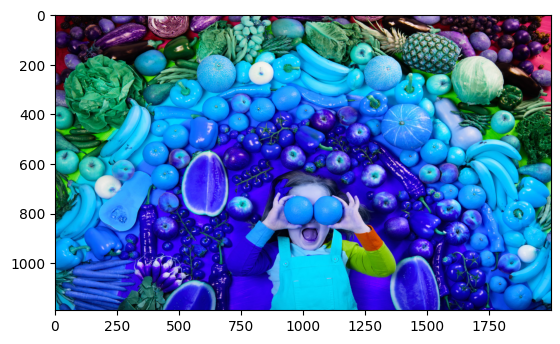

In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Učitavanje slike
img = cv2.imread('static/voce_01.png')
plt.imshow(img)

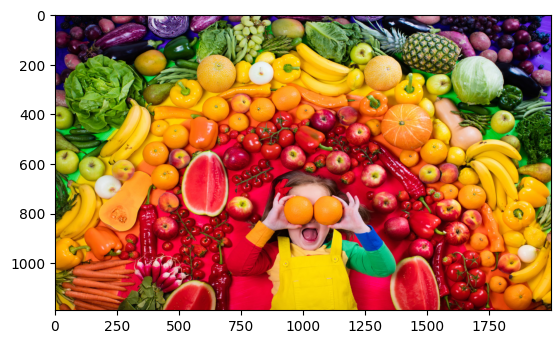

In [172]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV učitava slike kao BGR
plt.imshow(img)

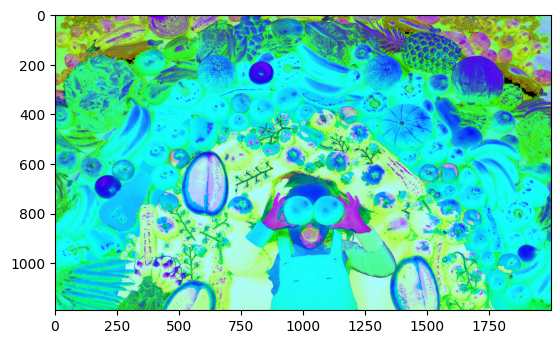

In [173]:
# Pretvorba u HSV (Hue, Saturation, Value) format
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)

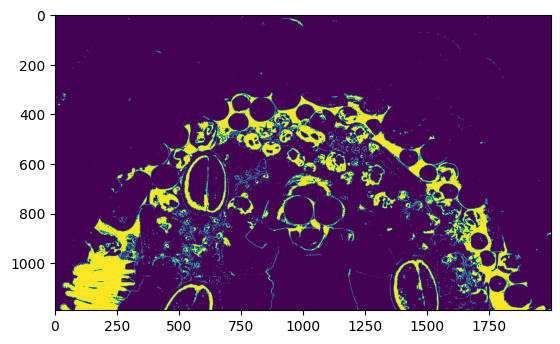

In [174]:
# Definicija raspona boja za različite objekte
color_ranges = {
    'red': ([0, 100, 100], [10, 255, 255]),
    'green': ([40, 100, 100], [70, 255, 255]),
    'blue': ([100, 100, 100], [140, 255, 255])
}

slike =[]

# Detekcija objekata za svaku boju
for color, (lower, upper) in color_ranges.items():
    lower = np.array(lower)
    upper = np.array(upper)

    # Kreiranje maske za detekciju boje
    mask = cv2.inRange(hsv, lower, upper)
    slike.append(mask);
    
     # Detekcija kontura
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crtanje pravokutnika oko detektiranih objekata
    for contour in contours:
        # Filtriranje malih kontura
        if cv2.contourArea(contour) > 500:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(slike[0])

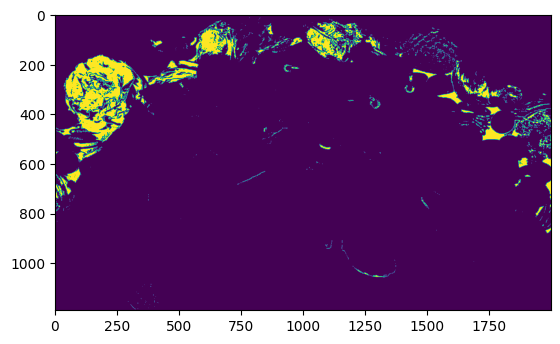

In [175]:
plt.imshow(slike[1])

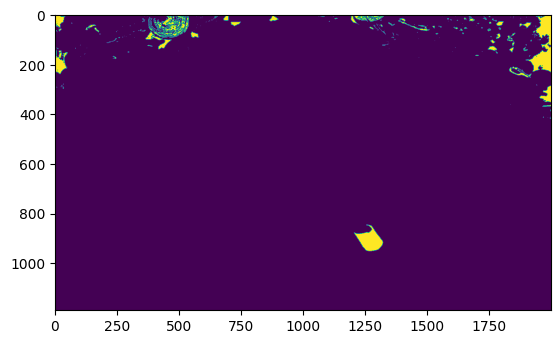

In [176]:
plt.imshow(slike[2])

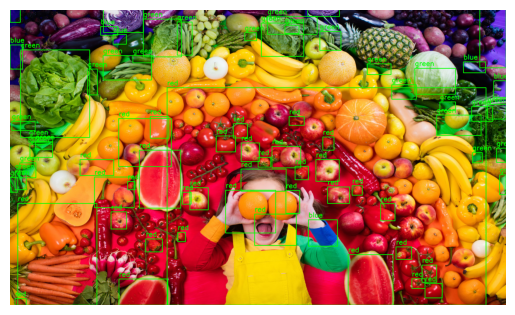

In [177]:
# Prikaz rezultata
plt.imshow(img)
plt.axis('off')
plt.show()